# Fraud Detection

In [4]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} pandas

Solving environment: done

## Package Plan ##

  environment location: /Users/vero/opt/anaconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38hecd8cb5_1         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                               4.10.0-py38hecd8cb5_0 --> 4.10.1-py38hecd8cb5_1



conda-4.10.1         | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [6]:
# Import Pandas
import pandas as pd
# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Import Numpy
import numpy as np

In [7]:
# Read the file with transactions history
data = pd.read_excel('/Users/vero/Documents/Programming for Big Data/Assignments/ASSIGNMENT-4+5/CC-3Y-Transactions.xlsx', sheet_name= 'Credit-Card-Transactions')
data.head(5)

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


In [8]:
# Check the data shape
data.shape

(26052, 6)

In [9]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


In [10]:
# Check of data type
type_of_data = pd.DataFrame(data.dtypes, columns = ['Type'])
type_of_data.columns.name = 'Variable'
type_of_data

Variable,Type
City,object
Date,datetime64[ns]
Card Type,object
Exp Type,object
Gender,object
Amount,int64


In [11]:
# Check the data for "Amount"
data.describe()

,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


In [38]:
# Fraud Detected Report
# Business rules:
    # Silver Card Holders cannot spend more than 472574 per single transaction
    # Signature Card Holders cannot spend more than 491837 per single transaction
    
# First, creating the data frame with the expenses data
FraudReport1 = pd.DataFrame(data[['Card Type','Exp Type','Amount']])

# Creating a dataframe for all expenses by type for Silver Card holders, as they have the lowest limits on transactions
Silver = pd.DataFrame(FraudReport1[FraudReport1['Card Type']=='Silver'])
Silver

,Card Type,Exp Type,Amount
2,Silver,Bills,101738
5,Silver,Bills,100036
8,Silver,Bills,192247
22,Silver,Bills,467014
25,Silver,Bills,622170
...,...,...,...
26042,Silver,Travel,194550
26043,Silver,Travel,280335
26047,Silver,Travel,128191
26049,Silver,Travel,265019


<AxesSubplot:title={'center':'Amount'}, xlabel='Exp Type'>

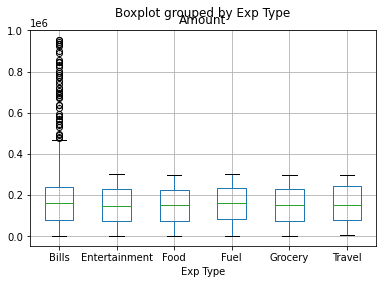

In [44]:
# Creating a boxplot chart for Silver Card holders by type of expenses to detect outliers
Silver.boxplot(by='Exp Type', column =['Amount'], grid = True)

# The boxplot for "Bills" type of expenses shows that values have significant outliers - transaction more than 4500000

In [41]:
# Check "Bills" data only for Silver Card Holders.
Silver_Bills = pd.DataFrame(Silver[Silver['Exp Type']=='Bills'])
Silver_Bills.describe()

,Amount
count,1334.000000
mean,174959.112444
std,139955.183743
min,1078.000000
25%,81102.250000
50%,159424.500000
75%,237690.750000
max,955468.000000


<AxesSubplot:>

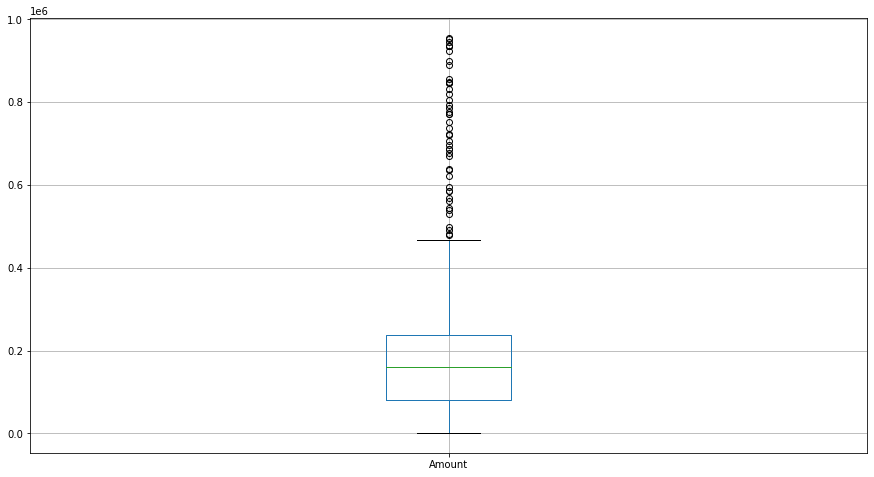

In [42]:
# Creating the boxplot to take a closer look on the data and see outliers for Gold holders expenses for "Bills"
Silver_Bills.boxplot(column =['Amount'], figsize=(15,8), grid = True)

In [45]:
# Defining the minimum value for outliers

Q1_1 = Silver_Bills.quantile(.25)
Q3_1 = Silver_Bills.quantile(.75)
IIQ_1 = abs(Q3_1 - Q1_1)
inferior_limit1 = Q1_1 - 1.5 * IIQ_1
superior_limit1 = Q3_1 + 1.5 * IIQ_1
superior_limit1

Amount    472573.5
dtype: float64

In [69]:
# Uploading data with a list of potential transaction frauds.
# The report is ready
FraudReport_Silver = data[data.Amount > 472574]
FraudReport_Silver = pd.DataFrame(FraudReport_Silver[FraudReport_Silver['Card Type']=='Silver']).set_index(['Card Type', 'Exp Type', 'Gender','City','Date'])
FraudReport_Silver

Amount
Card Type Exp Type Gender City                  Date              
Silver    Bills    F      Delhi, India          2014-09-27  622170
                                                2015-01-30  888341
                          Ahmedabad, India      2014-04-24  545286
                                                2014-08-24  540497
                          Bengaluru, India      2014-03-29  499079
                          Ahmedabad, India      2014-02-02  934205
                                                2015-02-17  804949
                          Greater Mumbai, India 2014-02-26  561220
                          Bengaluru, India      2015-03-24  687088
                          Greater Mumbai, India 2015-04-24  944398
                          Bengaluru, India      2015-05-15  775859
                          Greater Mumbai, India 2015-05-20  567623
                                                2014-05-23  752610
                          Ahmedabad, India      2014-03-25  846635
                                                2014-09-01  635473
                          Delhi, India          2015-01-24  478671
                          Bengaluru, India      2014-04-20  845653
                                                2014-10-18  784541
                          Ahmedabad, India      2014-10-02  772082
                          Delhi, India          2014-03-25  847958
                          Ahmedabad, India      2014-04-28  705464
                                                2014-02-04  955468
                          Delhi, India          2014-12-28  952640
                          Ahmedabad, India      2014-05-31  695749
                                                2014-01-22  584822
                          Delhi, India          2014-04-16  482394
                          Bengaluru, India      2014-04-24  491598
                          Greater Mumbai, India 2013-10-13  738456
                          Delhi, India          2014-06-07  772360
                          Greater Mumbai, India 2014-10-21  855465
                          Ahmedabad, India      2014-09-07  670750
                          Greater Mumbai, India 2014-12-25  677645
                          Delhi, India          2013-12-22  722048
                                                2015-04-04  830697
                          Greater Mumbai, India 2014-02-22  638570
                                                2014-12-08  936294
                          Delhi, India          2015-03-08  899343
                                                2015-02-13  593991
                                                2015-01-28  586474
                          Bengaluru, India      2014-05-12  686619
                          Ahmedabad, India      2014-10-07  530244
                          Delhi, India          2015-05-02  719835
                          Greater Mumbai, India 2014-08-02  922206
                          Bengaluru, India      2015-05-17  792440
                                                2014-02-25  820217
                          Ahmedabad, India      2014-06-16  934683

In [60]:
# First, creating the data frame with the expenses data
FraudReport2 = pd.DataFrame(data[['Card Type','Exp Type','Amount']])

# Creating a dataframe for all expenses by type for Signature Card holders
Signature = pd.DataFrame(FraudReport2[FraudReport2['Card Type']=='Signature'])
Signature

,Card Type,Exp Type,Amount
3,Signature,Bills,123424
11,Signature,Bills,278036
13,Signature,Bills,254359
14,Signature,Bills,302834
16,Signature,Bills,421878
...,...,...,...
26041,Signature,Travel,207941
26045,Signature,Travel,170049
26046,Signature,Travel,198903
26048,Signature,Travel,246316


<AxesSubplot:title={'center':'Amount'}, xlabel='Exp Type'>

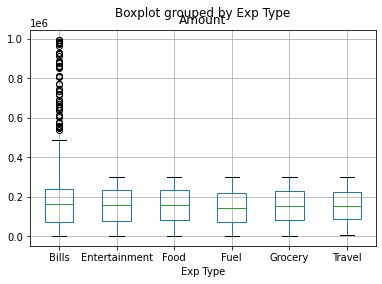

In [61]:
# Creating a boxplot chart for Silver Card holders by type of expenses to detect outliers
Signature.boxplot(by='Exp Type', column =['Amount'], grid = True)

# The boxplot for "Bills" type of expenses shows that values have significant outliers - transaction more than 4500000

In [62]:
# Check "Bills" data only for Signature Card Holders.

Signature_Bills = pd.DataFrame(Signature[Signature['Exp Type']=='Bills'])
Signature_Bills.describe()

,Amount
count,1259.000000
mean,179599.262907
std,156039.281589
min,1026.000000
25%,72539.000000
50%,162503.000000
75%,240258.000000
max,994537.000000


array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

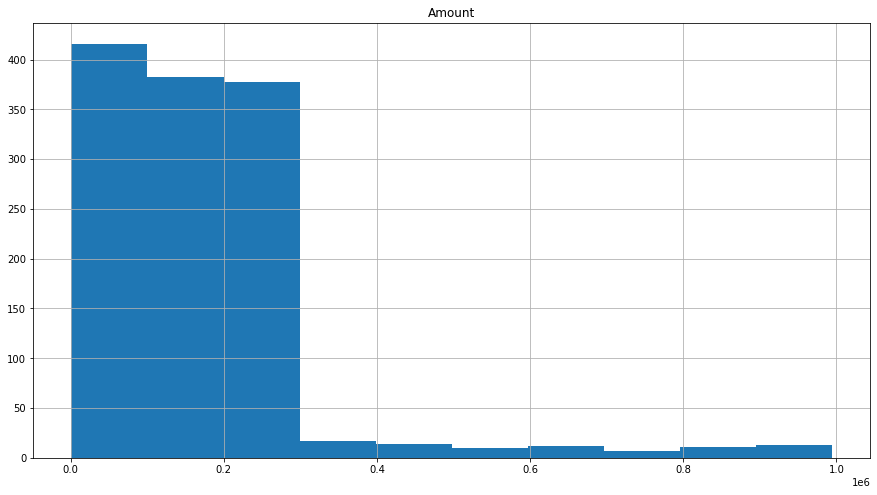

In [63]:
# Creating the histogram to take a closer look on the data and see outliers for Gold holders expenses for "Bills"
Signature_Bills.hist(column =['Amount'], figsize=(15,8), grid = True)

In [66]:
# Defining the minimum value for outliers

Q1_2 = Signature_Bills.quantile(.25)
Q3_2 = Signature_Bills.quantile(.75)
IIQ_2 = abs(Q3_2 - Q1_2)
inferior_limit2 = Q1_2 - 1.5 * IIQ_2
superior_limit2 = Q3_2 + 1.5 * IIQ_2
superior_limit2

Amount    491836.5
dtype: float64

In [70]:
# Uploading data with a list of potential transaction frauds.
# The report is ready
FraudReport_Signature = data[data.Amount > 491837]
FraudReport_Signature = pd.DataFrame(FraudReport_Signature[FraudReport_Signature['Card Type']=='Signature']).set_index(['Card Type', 'Exp Type', 'Gender','City','Date'])
FraudReport_Signature

Amount
Card Type Exp Type Gender City                  Date              
Signature Bills    F      Delhi, India          2014-07-01  809623
                          Greater Mumbai, India 2014-05-17  655846
                                                2014-04-27  551340
                          Delhi, India          2013-10-04  735037
                                                2013-12-07  733125
                          Greater Mumbai, India 2014-02-07  545977
                                                2013-10-29  557370
                          Delhi, India          2013-10-04  550782
                                                2013-12-07  712001
                          Greater Mumbai, India 2015-01-08  858729
                                                2015-02-15  646426
                          Bengaluru, India      2013-10-13  973026
                                                2014-03-06  984466
                          Greater Mumbai, India 2013-11-13  535101
                                                2013-10-22  978301
                          Delhi, India          2014-05-11  919877
                          Greater Mumbai, India 2014-12-03  559262
                          Bengaluru, India      2014-07-01  809907
                          Greater Mumbai, India 2015-05-06  554281
                          Delhi, India          2013-10-25  576994
                          Bengaluru, India      2013-10-06  677654
                          Greater Mumbai, India 2014-02-05  929247
                                                2014-03-26  570791
                                                2014-04-06  806821
                          Delhi, India          2014-03-28  555220
                                                2014-10-23  611486
                          Ahmedabad, India      2014-10-10  926072
                          Bengaluru, India      2014-02-21  718346
                          Ahmedabad, India      2014-10-13  856974
                                                2015-04-03  855990
                          Delhi, India          2015-02-16  924776
                          Greater Mumbai, India 2014-04-17  887442
                          Delhi, India          2015-03-14  687879
                          Bengaluru, India      2015-05-19  977951
                          Delhi, India          2013-10-28  861177
                                                2013-11-18  963751
                          Ahmedabad, India      2014-08-21  852806
                          Bengaluru, India      2014-05-10  640653
                          Ahmedabad, India      2015-01-09  745493
                          Delhi, India          2015-02-15  981404
                          Bengaluru, India      2014-11-24  639670
                          Greater Mumbai, India 2014-10-02  768467
                                                2015-05-05  912334
                          Bengaluru, India      2013-12-28  608438
                          Greater Mumbai, India 2014-04-16  668736
                          Ahmedabad, India      2014-08-03  770346
                          Delhi, India          2014-06-07  994537
                          Bengaluru, India      2015-04-04  880778
                                                2014-03-02  689201
                                                2015-03-17  602222
                          Delhi, India          2014-10-17  876491
                          Greater Mumbai, India 2014-09-06  994184
                          Ahmedabad, India      2013-12-31  653161